
# Dimensionality Reduction: An Introduction

Dimensionality reduction is a technique to decrease the complexity of the data by representing it with fewer dimensions. The assumption is that the essence or core content of the data does not span along all dimensions.

The aim of dimensionality reduction is to **preserve as much of the significant structure of the high-dimensional data as possible in the low-dimensional map**.

It identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in data.

For example, consider the following figure. Although x lives in two dimensions, it really occupies a small "lower dimension" in 1D subspace. This lower dimension accounts for the most varince in x.

<img src="https://cse.unl.edu/~hasan/Pics/DimensionalityReduction.png" width=600 height=400>

Thus, it would be useful to represent data in lower dimensions. There are at least two benefits of dimensionality reduction:
- Learning becomes easier because of fewer parameters.
- Enables visualization by projecting data in lower dimension. We can discover “intrinsic dimensionality” of data. We can determine that, for some problems, the high dimensional data is truly lower dimensional.




## Methods for Dimensionality Reduction 

There are two main methods for reducing dimensionality. 
- Feature selection:
        -- We are interested in finding k of the d dimensions that give us the most information and we discard the other (d − k) dimensions.

- Feature extraction: 
        -- We are interested in finding a **new** set of k dimensions that are combinations of the original d dimensions. 

#### In this notebook series we will investigate the feature extraction method of dimensionality reduction.



## Dimensionality Reduction by Feature Extraction

There are two types of feature extraction methods of dimensionality reduction:
- Linear methods
- Non-linear methods


## Linear Methods 

Linear methods of feature extraction for dimensionality reduction could be supervised or unsupervised depending on whether or not they use the output information. 

The best known and most widely used linear methods are:
- Principal Components Analysis (PCA) - unsupervised
- Linear Discriminant Analysis (LDA) - supervised

Two other unsupervised linear projection methods are: Factor Analysis (FA) and Multidimensional Scaling (MDS). 


## Non-Linear Methods 

The linear methods of dimensionality reduction are flexible, fast, and easily interpretable. For example, PCA works well when the data lies in a **linear subspace**. However, this may not hold in many applications when there are **nonlinear relationships** within the data in lower-dimension.

For example, the following dataset is three-dimensional. However, notice that it is created by folding a 2D plane. Thus, the intrinsic lower dimension is 2D. But, the lower-dimension sub-space is **non-linear**!

<img src="https://cse.unl.edu/~hasan/Pics/SwissRoll.png" width=400 height=200>

One approach to resolve this issue is use a non-linear dimensionality reduction technique that is known as Manifold Learning.

In Manifold Learning we assume that the data of interest **lie on an embedded non-linear manifold within the higher-dimensional space**. More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane.


We discuss the Manifold Learning non-linear methods in detail in a separate notebook.


### Manifold Learning Algorithms

There are many algorithms for implementing Manifold Learning.

- Locally Linear Embedding (LLE)
- Isometric feature mapping (Isomap)
- Multi-dimensional Scaling (MDS)
- t-distributed Stochastic Neighbor Embedding (t-SNE)

For information on other algorithms and their scikit-learn implementation:
https://scikit-learn.org/stable/modules/manifold.html



## Index for the Notebook Series on Dimensionality Reduction

There are 7 notebooks on Dimensionality Reduction.

- Dimensionality Reduction-1-Linear Methods

        Visualize linearly separable data using two linear methods: PCA and LDA

- Dimensionality Reduction-2-Non-Linear Methods-Manifold Learning

        Visualize linearly non-separable data using non-linear methods: LLE, Isomap, MDS, t-SNE
        
- Dimensionality Reduction-3-Introduction to t-SNE

       
 
- Dimensionality Reduction-4-Visualize MNIST in 2D using t-SNE

        Visualize high-dimensional MNIST data using t-SNE
 
- Dimensionality Reduction-5-Compression & Decompression Using PCA

        Perform data compression & decompression using PCA and investigate the effect of PCA on a classification algorithm
 
- Dimensionality Reduction-6-Incremental PCA

        How to apply apply PCA on a very large dataset and in active learning using incremental PCA
  
- Dimensionality Reduction-7-Kernel PCA

        Visualize linearly non-separable data using Kernel PCA



## Tasks for this Notebook

In this notebook we study two **linear methods** of dimensionality reduction for the purpose of data visualization.
- PCA
- LDA


## Principal Components Analysis (PCA): Main Idea


Principal components analysis (PCA) was originally a data reduction strategy to obtain a smaller set of
meaningful "components" from a set of related variables. It was formulated by **Harold Hotelling in 1933** and published in the Journal of Educational Psychology. Hotelling was trying to solve the problem of multiple indicators of educational ability (e.g., reading speed, arithmetic speed) to discover a single general construct (known as "general ability").

The main purpose of PCA is the analysis of data to identify patterns that represent the data “well.” The principal components can be understood as new axes of the dataset that maximize the variance along those axes (the eigenvectors of the covariance matrix). In other words, PCA aims to find the axes with maximum variances along which the data is most spread.

Consider the following figure to understand the main idea of PCA.

The feature is two dimensional: $x_1$ and $x_2$. However, the sample variance is the largest along $z_1$. But $z_1$ is not aligned with any of the feature dimension ($x_1$ or $x_2$).

So, we don’t know which feature contributes more towards the variance of the data. This happens because features co-vary. To reveal the individual contribution of each feature towards explaining the variance, we need to de-correlate them.

We could do this by rotating the data so that $z_1$ and $x_1$ are aligned. Then, we would know whether $x_1$ has the largest variance!

Using PCA, first we center the sample (figure on the right). Then rotate the axes ($x_1$-$x_2$) to line up with the directions of highest variance. If the variance on $z_2$ is too small, it can be ignored and we have dimensionality reduction from two to one.



<img src="https://cse.unl.edu/~hasan/Pics/PCA2.png" width=600 height=200>


In short, when data has covariance, using PCA we project the data along the direction of large variances so that covariance vanishes. This is done by **diagonalizing the covariance matrix**. Note that covariance matrix is symmetric. Thus, it has an orthonormal basis of eigenvectors. We can change its bases to orthonormal bases of eigenvectors via diagonalization. 

After the diagonalization we are able to construct a set of new features (represented by the eigenvectors). The eigenvector with the largest eigenvalue is our most discriminating feature. This is how we **extract features** by manipulating the covariance matrix!

This type of diagonalization is done via **eigendecomposition**. However, eigendecomposition is limited to only square matrices and it's very slow for high-dimensional matrices. For a dataset with very large feature dimension, its covariance matrix will have higher-dimension.

A faster solution to the matrix diagonalization problem is **Singular Value Decomposition (SVD)**.

The Scikit-Learn implementation of PCA is based on SVD.
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


## PCA on the Iris Dataset
We will use a simple dataset (Iris) to see how PCA extracts features (the combination of features or principal components, or directions in the feature space) that account for the most variance in the data. This will enable us to **visualize** a high-dimensional data (4D) by projecting it into a lower dimension (2D).


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Visualizing High-Dimensional Data in Lower Dimension using PCA

We use the Iris dataset for this illustration.

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150


<img src="https://cse.unl.edu/~hasan/IrisFlowers.png" width=800, height=400>





We apply PCA to plot the different samples on the **first two principal components**.


## Load the Data

In [2]:
iris = load_iris()

print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


## Create Feature (Data) Matrix X and Target Vector (y)

We create the data matrix X that has 4 features as 4 columns.

We also create the target vector containing the labels (flower type). However, PCA doesn't require the data labels. We need this for another dimensionality reduction technique.

In [3]:
X = iris["data"]
y = iris["target"]

print("Dimension of X: ", X.shape)

Dimension of X:  (150, 4)


## Standardize the Data

PCA is influenced by scale of the data. Thus we need to scale the features of the data before applying PCA. 

For understanding the negative effect of not scaling the data, see the following post:

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [4]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

## Projection of the Data from 4D to 2D

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). 

Using PCA we will project the original data which is 4 dimensional into 2 dimensions. 

Note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.


### PCA: Parameters

- n_components : int, float, None or string

        Number of components to keep. if n_components is not set all components are kept:

        n_components == min(n_samples, n_features)

        If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension. Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'.

        If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

        If svd_solver == 'arpack', the number of components must be strictly less than the minimum of n_features and n_samples.

        Hence, the None case results in:

        n_components == min(n_samples, n_features) - 1

- copy : bool (default True)

        If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.

- whiten : bool, optional (default False)

        When True (False by default) the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.

        Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

- svd_solver : string {‘auto’, ‘full’, ‘arpack’, ‘randomized’}

        auto : the solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.

        full : run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing

        arpack : run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. It requires strictly 0 < n_components < min(X.shape)

        randomized : run randomized SVD by the method of Halko et al.



- tol : float >= 0, optional (default .0)

        Tolerance for singular values computed by svd_solver == ‘arpack’.



- iterated_power : int >= 0, or ‘auto’, (default ‘auto’)

        Number of iterations for the power method computed by svd_solver == ‘randomized’.



- random_state : int, RandomState instance or None, optional (default None)

        If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random. Used when svd_solver == ‘arpack’ or ‘randomized’.

## Note on Whitening

We use PCA to reduce the dimension of the data. There is a closely related preprocessing step called **whitening (or, in some other literatures, sphering**) which is needed for some algorithms. 

The goal of whitening is to **make the input less redundant**. In image classification problems the input data adjacent pixels are highly correlated. Thus our desire is to whiten the data such that the classification/regression algorithms see a training input where (i) the features are less correlated with each other, and (ii) the features all have the same variance.

A whitening transformation or sphering transformation is a linear transformation that transforms a vector of random variables with a known covariance matrix into a set of new variables whose covariance is the identity matrix, meaning that they are **uncorrelated and each have variance 1**. The transformation is called "whitening" because it changes the input vector into a white noise vector.


To apply whitening along with the PCA, the "whiten" parameter of PCA should be set to True.



## PCA of the Iris Dataset

To apply PCA on the Iris dataset, we only set the "n_components" parameter. Since we want to project the 4D Iris data matrix X into 2D, we set the value of this parameter to 2.

- Alternatively, we can set the percentage of variance we want to keep in the extracted features (principle components). For example: if we want to retain 95% variance, then n_components=0.95

In [5]:
pca = PCA(n_components=2) 
#pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print("Number of Principle Components (Extracted Features): ", pca.n_components_) 

Number of Principle Components (Extracted Features):  2


## Explained Variance

After we have discovered the principle components (axes), we need to know how much information (variance) can be attributed to each of the principal components. 

We get this information by using two attributes:


- explained_variance_
        -- The amount of variance explained by each of the selected components.
    
- explained_variance_ratio_
        -- Percentage of variance explained by each of the selected components.

Note that due to the reduction in data dimensions (from 4D to 2D), we lose some of the variance (information). By using the attribute explained_variance_ratio_, we can see that the first principal component contains approx. 73% of the variance and the second principal component contains 23% of the variance. Together, the two components contain 96% of the information.


In [6]:
# Explained variance for each component
print("Explained variance (first two components): %s"
      % str(pca.explained_variance_))


# Percentage of variance explained for each component
print("\nExplained variance ratio (first two components): %s"
      % str(pca.explained_variance_ratio_))

Explained variance (first two components): [2.93808505 0.9201649 ]

Explained variance ratio (first two components): [0.72962445 0.22850762]


## Visualization of the Data In Lower Dimension (2D)

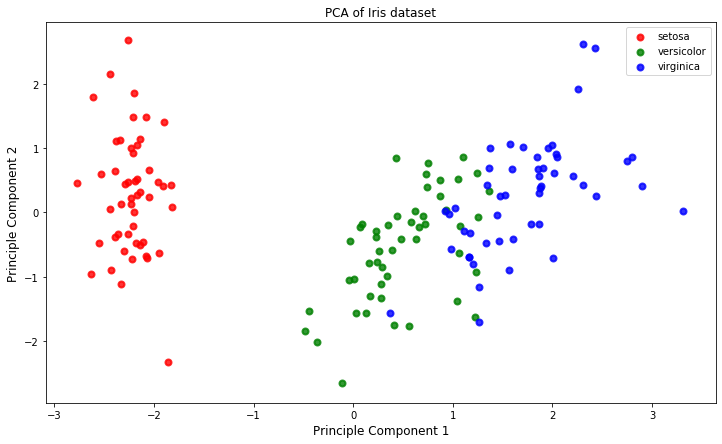

In [7]:
target_names = iris.target_names

colors = ['navy', 'turquoise', 'darkorange']
colors = ['r', 'g', 'b']

# Draw a scatter plot
plt.figure(figsize=(12,7))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=2,
                label=target_name)
   
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("Principle Component 1", fontsize=12)
plt.ylabel("Principle Component 2", fontsize=12)
plt.title('PCA of Iris dataset')
plt.show()


## PCA: Limitations

There are some limitations of PCA:

- PCA works only when data features are linearly dependent. It does not directly work for non-linear features (discussed in detail in notebook II).
- PCA assumes that the data has a Gaussian distribution and doesn't work for data that doesn't have Gaussian distribution.
- PCA assumes that the most discriminative information is captured by the largest variance in the feature space. Since the direction of the largest variance encodes the most information this is likely to be true. However, there are cases where the discriminative information actually resides in the directions of the smallest variance. In that case PCA could greatly hurt classification performance. 

Let's use an example to illustrate the **last limitation**.

In the following figure consider the two cases, where we reduce the 2D feature space to a 1D representation using PCA.

In the second case (bottom figure), PCA would hurt classification performance because the data becomes linearly non-separable. This happens when the **most discriminative information resides in the smaller eigenvector**. In this case, we use another dimensionality reduction technique known as **Linear Discriminant Analysis (LDA)**.



<img src="https://cse.unl.edu/~hasan/Pics/PCA3.png" width=600 height=200>

## Linear Discriminant Analysis (LDA)


LDA tries to find the projection vector that optimally separates the two classes. It is a **supervised method** for dimensionality reduction for classification problems. Thus, it requires the label of the data.

Let's illustrate the main idea of LDA using a binary clasification problem.

Consider the folowing figure in which the sample data $\vec{x}$ is 2 dimensional (2 features $x_1$ and $x_2$). LDA projects this 2D feature on a 1D line by finding a vector on which the projection of data will make the largest separation.


<img src="https://cse.unl.edu/~hasan/Pics/LDA1.png" width=700 height=300>

In case of a binary class problem, LDA acts as a classifier like “logistic regression”.

We will use Scikit-Learn's **LinearDiscriminantAnalysis** class to reduce the dimensionality of the Iris dataset by projecting it to the most discriminative directions (in 2D). 

In [8]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

# The mean accuracy on the given test data and labels
lda.score(X, y)

0.98

## Explained Variance

To learn how much information (variance) can be attributed to each of the principal components we use the explained_variance_ratio_ attribute.
    
- explained_variance_ratio_
        -- Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of explained variances is equal to 1.0. 


In [9]:
# Percentage of variance explained for each component
print("\nExplained variance ratio (first two components): %s"
      % str(lda.explained_variance_ratio_))


Explained variance ratio (first two components): [0.9912126 0.0087874]


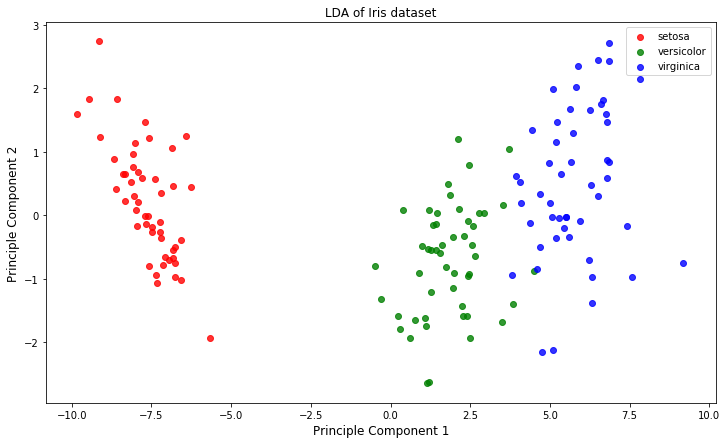

In [10]:
# Draw a scatter plot
plt.figure(figsize=(12,7))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("Principle Component 1", fontsize=12)
plt.ylabel("Principle Component 2", fontsize=12)
plt.title('LDA of Iris dataset')
plt.show()

## Comparison Between PCA and LDA

Observe that LDA keep classes as far apart as possible, as compared to PCA.

Because LDA learns the **most discriminative axes** between the classes, and these axes can then be used to define a hyperplane onto which to project the data.

Thus,LDA is a good technique to reduce dimensionality before running another classification algorithm.

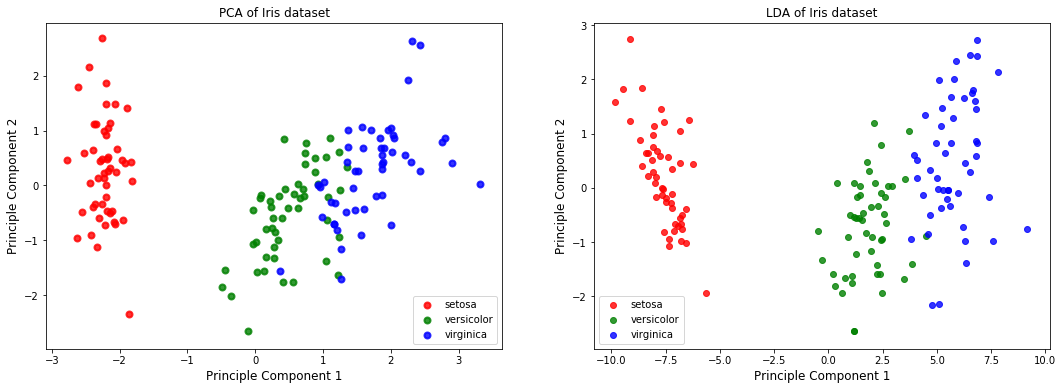

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(121)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=2,
                label=target_name)
   
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("Principle Component 1", fontsize=12)
plt.ylabel("Principle Component 2", fontsize=12)
plt.title('PCA of Iris dataset')


plt.subplot(122)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("Principle Component 1", fontsize=12)
plt.ylabel("Principle Component 2", fontsize=12)
plt.title('LDA of Iris dataset')
plt.show()

## Visualization in 2D using t-SNE

CPU times: user 5.32 s, sys: 478 ms, total: 5.8 s
Wall time: 760 ms


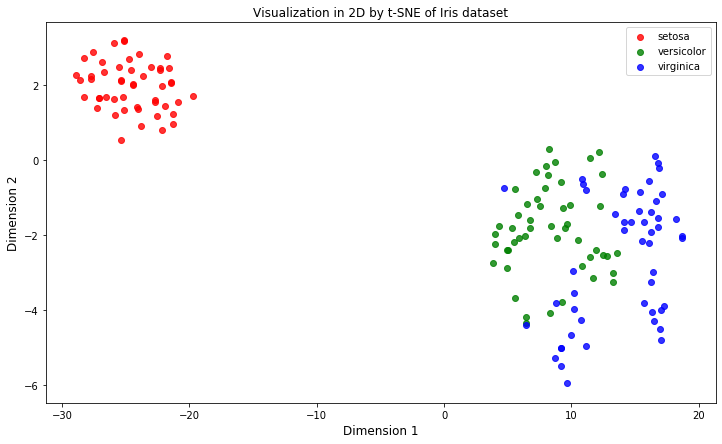

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
%time X_reduced_tsne = tsne.fit_transform(X)


# Draw a scatter plot
plt.figure(figsize=(12,7))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_reduced_tsne[y == i, 0], X_reduced_tsne[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.title('Visualization in 2D by t-SNE of Iris dataset')
plt.show()